### Librerias a utilizar

In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade threadpoolctl

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0



In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import glob
import os
import string
import emoji
from nltk.stem import SnowballStemmer
from nltk import tokenize 
from textblob import TextBlob
from nltk.tokenize import word_tokenize 
from collections import Counter
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
import nltk
import csv
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.corpus import names

In [4]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\cacho\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [5]:
nltk.download('names')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\cacho\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [6]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cacho\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\cacho\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [8]:
import os
import warnings
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
import plotly.express as px
from pandas import DataFrame
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib import colors as mcolors
#from predictPy import Analisis_Predictivo
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

pd.options.display.max_rows = 10
warnings.filterwarnings("ignore")

In [9]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global     = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":   precision_global, 
            "Error Global":       error_global, 
            "Precisión por categoría":precision_categoria}

In [10]:
import matplotlib.ticker as mticker

def distribucion_variable_predecir(data:pd.DataFrame,variable_predict:str, ax = None):
    if ax == None:
        fig, ax = plt.subplots(1,1, figsize = (15,10), dpi = 200)
    colors = list(dict(**mcolors.CSS4_COLORS))
    df = pd.crosstab(index = data[variable_predict],columns = "valor") / data[variable_predict].count()
    countv = 0
    titulo = "Distribución de la variable %s" % variable_predict
    
    for i in range(df.shape[0]):
        ax.barh(1, df.iloc[i], left = countv, align = 'center', color = colors[11 + i], label = df.iloc[i].name)
        countv = countv + df.iloc[i]
        
    ax.set_xlim(0,1)
    ax.set_yticklabels("")
    ax.set_ylabel(variable_predict)
    ax.set_title(titulo)
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(['{:.0%}'.format(x) for x in ticks_loc])
    
    countv = 0
    for v in df.iloc[:,0]:
        ax.text(np.mean([countv, countv + v]) - 0.03, 1 , '{:.1%}'.format(v), color = 'black', fontweight = 'bold')
        countv = countv + v
    ax.legend(loc = 'upper center', bbox_to_anchor = (1.08, 1), shadow = True, ncol = 1)

In [11]:
def poder_predictivo_categorica(data: pd.DataFrame, var: str, variable_predict: str, ax=None):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize = (15, 10), dpi = 200)
    df = pd.crosstab(index = data[var], columns = data[variable_predict])
    df = df.div(df.sum(axis = 1), axis = 0)
    titulo = "Distribución de la variable %s según la variable %s" % (var, variable_predict)
    df.plot(kind = 'barh', stacked = True,   legend = True, ax = ax,
            xlim = (0, 1), title   = titulo, width = 0.8)
            
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(['{:.0%}'.format(x) for x in ticks_loc])
    ax.legend(loc = 'upper center', bbox_to_anchor = (1.08, 1), 
              shadow = True, ncol = 1)
              
    for bars in ax.containers:
        plt.setp(bars, width = .9)
    for i in range(df.shape[0]):
        countv = 0
        for v in df.iloc[i]:
            ax.text(np.mean([countv, countv+v]) - 0.03, i,
                    '{:.1%}'.format(v), color = 'black', fontweight = 'bold')
            countv = countv + v

In [12]:
def poder_predictivo_numerica(data:pd.DataFrame, var:str, variable_predict:str):
    sns.FacetGrid(data, hue = variable_predict, height = 8, aspect = 1.8).map(sns.kdeplot, var, shade = True).add_legend()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.ticker as mticker
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns


class Analisis_Predictivo:

    def __init__(self, datos: pd.DataFrame, predecir: str, predictoras=[],
                 modelo=None, estandarizar = True,train_size=0.75, random_state=None):
        '''
        datos: Datos completos y listos para construir un modelo   

        predecir: Nombre de la variable a predecir

        predictoras: Lista de los nombres de las variables predictoras.
        Si vacío entonces utiliza todas las variables presentes excepto la variable a predecir.

        modelo: Instancia de una Clase de un método de clasificación(KNN,Árboles,SVM,etc).
        Si no especifica un modelo no podrá utilizar el método fit

        estandarizar: Indica si se debe o no estandarizar los datos que utilizará el estimador.

        train_size: Si el valor es tipo flotante entre 0.0 y 1.0 entonces representa la proporción de la tabla de entrenamiento.
        Si el valor es un entero entonces representa el valor absoluto de la tabla de entrenamiento.

        random_state: Semilla aleatoria para la división de datos(training-testing).
        '''
        self.datos = datos
        self.predecir = predecir
        self.predictoras = predictoras
        self.nombre_clases = list(np.unique(self.datos[predecir].values))
        self.modelo = modelo
        self.random_state = random_state
        if modelo != None:
            self.train_size = train_size
            self._training_testing(estandarizar)

    def _training_testing(self, estandarizar = True):
        if len(self.predictoras) == 0:
            X = self.datos.drop(columns=[self.predecir])
            self.predictoras = list(X.columns.values)
        else:
            X = self.datos[self.predictoras]

        if estandarizar:
            X = pd.DataFrame(StandardScaler().fit_transform(X), columns= X.columns)

        y = self.datos[self.predecir].values

        train_test = train_test_split(X, y, train_size=self.train_size,
                                      random_state=self.random_state)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test

    def fit_predict(self):
        if(self.modelo != None):
            self.modelo.fit(self.X_train, self.y_train)
            return self.modelo.predict(self.X_test)

    def fit_predict_resultados(self, imprimir=True):
        if(self.modelo != None):
            prediccion = self.fit_predict()
            MC = confusion_matrix(self.y_test, prediccion, labels= self.nombre_clases)
            indices = self.indices_general(MC, self.nombre_clases)
            if imprimir == True:
                for k in indices:
                    print("\n%s:\n%s" % (k, str(indices[k])))

            return indices

    def indices_general(self, MC, nombres=None):
        "Método para calcular los índices de calidad de la predicción"
        precision_global = np.sum(MC.diagonal()) / np.sum(MC)
        error_global = 1 - precision_global
        precision_categoria = pd.DataFrame(MC.diagonal()/np.sum(MC, axis=1)).T
        if nombres != None:
            precision_categoria.columns = nombres
        return {"Matriz de Confusión": MC,
                "Precisión Global": precision_global,
                "Error Global": error_global,
                "Precisión por categoría": precision_categoria}

    def distribucion_variable_predecir(self, ax=None):
        "Método para graficar la distribución de la variable a predecir"
        variable_predict = self.predecir
        data = self.datos
        if ax == None:
            fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=200)
        colors = list(dict(**mcolors.CSS4_COLORS))
        df = pd.crosstab(index=data[variable_predict],
                         columns="valor") / data[variable_predict].count()
        countv = 0
        titulo = "Distribución de la variable %s" % variable_predict
        for i in range(df.shape[0]):
            ax.barh(1, df.iloc[i], left=countv, align='center',
                    color=colors[11+i], label=df.iloc[i].name)
            countv = countv + df.iloc[i]
        ax.set_xlim(0, 1)
        ax.set_yticklabels("")
        ax.set_ylabel(variable_predict)
        ax.set_title(titulo)
        ticks_loc = ax.get_xticks().tolist()
        ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        ax.set_xticklabels(['{:.0%}'.format(x) for x in ticks_loc])
        countv = 0
        for v in df.iloc[:, 0]:
            ax.text(np.mean([countv, countv+v]) - 0.03, 1,
                    '{:.1%}'.format(v), color='black', fontweight='bold')
            countv = countv + v
        ax.legend(loc='upper center', bbox_to_anchor=(
            1.08, 1), shadow=True, ncol=1)

    def poder_predictivo_categorica(self, var: str, ax=None):
        "Método para ver la distribución de una variable categórica respecto a la predecir"
        data = self.datos
        variable_predict = self.predecir
        if ax == None:
            fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=200)
        df = pd.crosstab(index=data[var], columns=data[variable_predict])
        df = df.div(df.sum(axis=1), axis=0)
        titulo = "Distribución de la variable %s según la variable %s" % (
            var, variable_predict)
        df.plot(kind='barh', stacked=True, legend=True,
                ax=ax, xlim=(0, 1), title=titulo, width=0.8)
        ticks_loc = ax.get_xticks().tolist()
        ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        ax.set_xticklabels(['{:.0%}'.format(x) for x in ticks_loc])
        ax.legend(loc='upper center', bbox_to_anchor=(
            1.08, 1), shadow=True, ncol=1)
        for bars in ax.containers:
            plt.setp(bars, width=.9)
        for i in range(df.shape[0]):
            countv = 0
            for v in df.iloc[i]:
                ax.text(np.mean([countv, countv+v]) - 0.03, i, '{:.1%}'.format(v),
                        color='black', fontweight='bold')
                countv = countv + v

    def poder_predictivo_numerica(self, var: str):
        "Función para ver la distribución de una variable numérica respecto a la predecir"
        sns.FacetGrid(self.datos, hue=self.predecir, height=8, aspect=1.8).map(
            sns.kdeplot, var, shade=True).add_legend()

****

In [14]:
def strip_formatting(text):
    if isinstance(text, str):
        return re.sub(r'\r\n|\r|\n', ' ', text)
    else:
        return str(text)

def normalize_whitespace(text):
    return re.sub(r'\s+', ' ', text)

def remove_html_entities(text):
    return re.sub(r'&[^;]*;', '', text)

def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

def remove_punctuation_and_commas(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_emojis(text):
    """
    Removes all emojis from the input text.
    
    Args:
    text (str): Text to remove emojis from
    
    Returns:
    str: Text with all emojis removed
    """
    return text.encode('ascii', 'ignore').decode('ascii')

def remove_mentions(text):
    """Remove mentions from text."""
    return re.sub(r'@\w+', '', text)

def remove_urls(text):
    """
    Removes all https links from the input text using regex.
    
    Args:
    text (str): Input text
    
    Returns:
    str: Text with all https links removed
    """
    # Define regex pattern to match https links
    pattern = re.compile(r'https\S+')
    
    # Remove all instances of https links from the text
    text = re.sub(pattern, '', text)
    
    return text


def tokenize(text):
    return word_tokenize(text)

In [15]:
def find_names(text):
    # tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)
    
    # loop through each sentence and find all named entities
    names = []
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged_words = nltk.pos_tag(words)
        named_entities = nltk.ne_chunk(tagged_words, binary=True)
        for entity in named_entities:
            if isinstance(entity, nltk.tree.Tree) and entity.label() == 'NE':
                name = ' '.join([word for word, tag in entity.leaves()])
                names.append(name.lower())
    
    # count the number of occurrences of each name
    counts = Counter(names)
    
    # return a list of unique names and their counts
    return [(name, count) for name, count in counts.items()]


In [16]:
def find_names1(text):
    # Tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # Extract all the named entities from the sentences
    named_entities = []
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(tokens)
        named_entities.extend(nltk.ne_chunk(tagged, binary=False).subtrees(lambda t: t.label() == 'PERSON'))

    # Extract the names from the named entities using regex
    names = []
    for tree in named_entities:
        if hasattr(tree, 'label') and tree.label() == 'PERSON':
            name = ' '.join([child[0] for child in tree])
            name = re.sub('[^a-zA-Z \n\.]', '', name)
            names.append(name.strip())

    return names

In [17]:
def plot_reviews(df):
    fig, ax = plt.subplots(1, figsize=(12, 4))

    # Plot histogram of review_text column
    ax.hist(df['review_text'].apply(len), bins=50)
    ax.set_xlabel('Length of review_text')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of review_text length')

    plt.show()


In [18]:
def plot_review_variables(df, color='red'):
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # Length of each review
    axs[0, 0].hist(df['LengthReview'], bins=50, color=color)
    axs[0, 0].set_xlabel('Length of review_text')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].set_title('Distribution of review_text length')

    # Number of punctuations
    axs[0, 1].hist(df['NumPunctuations'], bins=20, color=color)
    axs[0, 1].set_xlabel('Number of punctuations')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].set_title('Distribution of punctuations')

    # Number of hashtags
    axs[0, 2].hist(df['NumHashtags'], bins=10, color=color)
    axs[0, 2].set_xlabel('Number of hashtags')
    axs[0, 2].set_ylabel('Count')
    axs[0, 2].set_title('Distribution of hashtags')

    # Number of sentences
    axs[1, 0].hist(df['NumSentences'], bins=10, color=color)
    axs[1, 0].set_xlabel('Number of sentences')
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].set_title('Distribution of sentences')

    # Number of words
    axs[1, 1].hist(df['NumWords'], bins=30, color=color)
    axs[1, 1].set_xlabel('Number of words')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].set_title('Distribution of words')

    # AllAlphabets
    axs[1, 2].hist(df['AllAlphabets'], bins=2, color=color)
    axs[1, 2].set_xlabel('AllAlphabets')
    axs[1, 2].set_ylabel('Count')
    axs[1, 2].set_title('Distribution of AllAlphabets')

    # AllDigits
    axs[2, 0].hist(df['AllDigits'], bins=2, color=color)
    axs[2, 0].set_xlabel('AllDigits')
    axs[2, 0].set_ylabel('Count')
    axs[2, 0].set_title('Distribution of AllDigits')

    # AllAlNum
    axs[2, 1].hist(df['AllAlNum'], bins=2, color=color)
    axs[2, 1].set_xlabel('AllAlNum')
    axs[2, 1].set_ylabel('Count')
    axs[2, 1].set_title('Distribution of AllAlNum')

    # Number of At signs
    axs[2, 2].hist(df['NumAtSigns'], bins=10, color=color)
    axs[2, 2].set_xlabel('Number of @ signs')
    axs[2, 2].set_ylabel('Count')
    axs[2, 2].set_title('Distribution of @ signs')

    plt.show()

In [19]:
# Crea dos listas vacías para almacenar las reviews y los nombres de archivo
reviews = []
file_names = []

# Itera a través de los archivos que contienen las reviews y lee el contenido de cada archivo.
for file in glob.glob("C:/Users/Ana/Documents/Tec/Semestre 6/IA/Day/aclImdb_v1/aclImdb/train/pos/*.txt"):
    with open(file, "r", encoding='utf-8') as f:
        review = f.read()
        reviews.append(review)
        file_name = os.path.basename(file)
        file_names.append(file_name)

# Crea un DataFrame a partir de las listas, con columnas para las reviews y los nombres de archivo.
df = pd.DataFrame({"file_name": file_names, "review_text": reviews})

In [20]:
#Duplicating review_text to perform data preprocessing
df = df.assign(review_text_clean=df['review_text'])

### Visualization

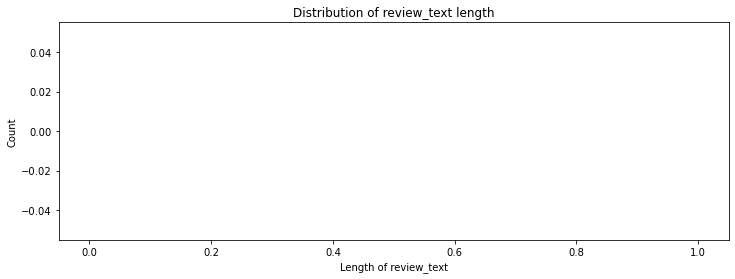

In [21]:
plot_reviews(df)

### Features

In [22]:
#Length of each review
df['LengthReview'] = df['review_text'].map(lambda x:len(x))
punctuationList = string.punctuation
#number of punctuations 
df['NumPunctuations'] = df['review_text'].map(lambda x:len([char for char in x if char in punctuationList]))
#number of hashtags
df['NumHashtags'] = df['review_text'].map(lambda x:len(re.findall("\#.?\s|\#.?$", x)))
#number of sentences
df['NumSentences'] = df['review_text'].map(lambda x:len(x.split('.')))
#number of words
df['NumWords'] = df['review_text'].map(lambda x:len(x.split(' ')))
#isalpha - does a review contain just alphabetical characters
df['AllAlphabets'] = df['review_text'].map(lambda x:x.isalpha())
#isdigit - does a review contain just digits
df['AllDigits'] = df['review_text'].map(lambda x:x.isdigit())
#isalnum - does a review contain just alphanumeric characters
df['AllAlNum'] = df['review_text'].map(lambda x:x.isalnum())
#number of at sign - call out how many names in his/her review
df['NumAtSigns'] = df['review_text'].map(lambda x:len(re.findall("\@.?\s|\@.?$", x)))
#Find names and count them
#df['names'] = df['review_text'].apply(find_names)

# Finding the count of common words
df['love_count'] = df['review_text'].apply(lambda x: sum([1 for word in x.lower().split() if word == 'love']))
df['life_count'] = df['review_text'].apply(lambda x: sum([1 for word in x.lower().split() if word == 'life']))
df['characters_count'] = df['review_text'].apply(lambda x: sum([1 for word in x.lower().split() if word == 'characters']))
df['world_count'] = df['review_text'].apply(lambda x: sum([1 for word in x.lower().split() if word == 'world']))
df['young_count'] = df['review_text'].apply(lambda x: sum([1 for word in x.lower().split() if word == 'young']))
df['plot_count'] = df['review_text'].apply(lambda x: sum([1 for word in x.lower().split() if word == 'plot']))
df['real_count'] = df['review_text'].apply(lambda x: sum([1 for word in x.lower().split() if word == 'real']))
df['acting_count'] = df['review_text'].apply(lambda x: sum([1 for word in x.lower().split() if word == 'acting']))

In [23]:
df

,file_name,review_text,review_text_clean,LengthReview,NumPunctuations,NumHashtags,NumSentences,NumWords,AllAlphabets,AllDigits,AllAlNum,NumAtSigns,love_count,life_count,characters_count,world_count,young_count,plot_count,real_count,acting_count


### Visualization Clean

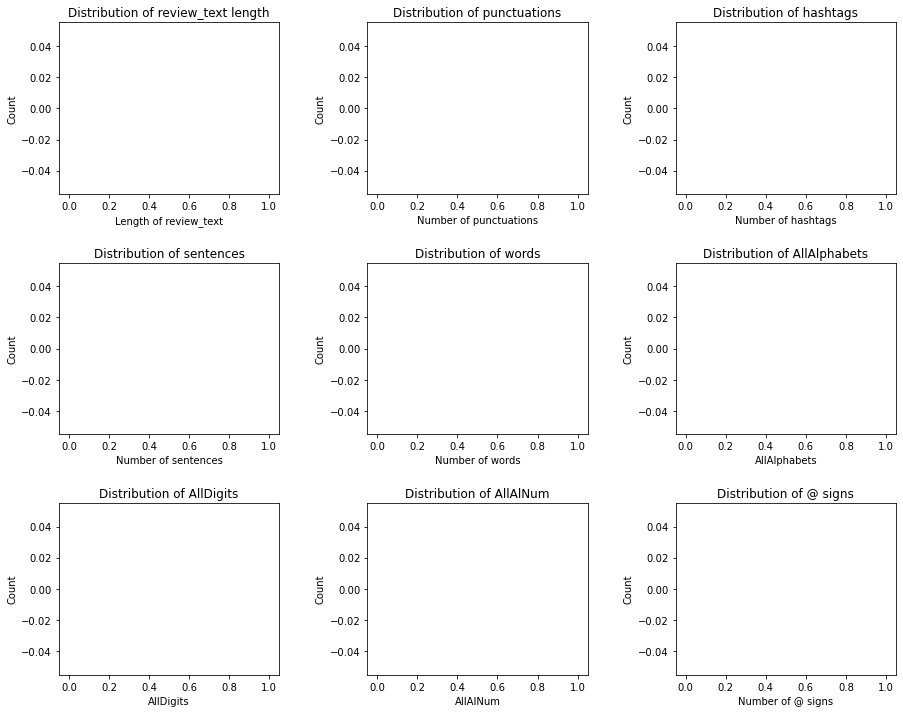

In [24]:
plot_review_variables(df,color ='orange')

### Cleaning

In [25]:
# List of functions to apply
functions = [strip_formatting, normalize_whitespace, remove_html_entities, remove_hashtags, 
             remove_urls, remove_emojis, remove_mentions, remove_punctuation_and_commas]

# Columns to apply the functions to
columns = ['review_text_clean']

# Loop over the columns and apply the functions
for col in columns:
    for func in functions:
        df[col] = df[col].apply(func)

### Tokenize

In [26]:
df['review_text_clean'] = df['review_text_clean'].str.lower()

AttributeError: Can only use .str accessor with string values!

In [ ]:
#generate tokens
tokens_imdb = df['review_text_clean'].apply(nltk.word_tokenize)
# convert all tokens to lower case
lower_tokens_imdb = [[t.lower() for t in tokens] for tokens in tokens_imdb]
# bag of words
bow_simple_imdb = Counter([t for tokens in lower_tokens_imdb for t in tokens])

### Stop Word Removal

In [ ]:
stop_words = set(stopwords.words('english'))
manual_stop_words = ["movie", "film"]
for word in manual_stop_words:
    stop_words.add(word)
    
# Remove stop words from the list of words
filtered_tokens_imdb = [[t for t in tokens if t.lower() not in stop_words] for tokens in lower_tokens_imdb]
filtered_tokens_imdb

In [ ]:
# generate a bag of words from the stemmed tokens
bow_filtered_tokens_imdb1 = Counter([t for tokens in filtered_tokens_imdb for t in tokens])

In [ ]:
bow_filtered_tokens_imdb1.most_common(1)

### Stemming/Lemmatization

In [ ]:
# create a Snowball stemmer for English
stemmer = SnowballStemmer('english')

# perform stemming on your tokens
stemmed_tokens_imdb = [[stemmer.stem(token) for token in tokens] for tokens in filtered_tokens_imdb]

# generate a bag of words from the stemmed tokens
bow_stemmed_imdb = Counter([t for tokens in stemmed_tokens_imdb for t in tokens])

### Feature Extraction

In [ ]:
# create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=8000)

# fit and transform the stemmed tokens
tfidf_stemmed_imdb = vectorizer.fit_transform([' '.join(tokens) for tokens in stemmed_tokens_imdb])

# calculate the cosine similarity between documents
#cos_sim = cosine_similarity(tfidf_stemmed_tweet)

### Modeling

In [ ]:
# create a function to get the polarity score of a text
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# apply the function on the review_text column to get the polarity score for each review
df['rating'] = df['review_text'].apply(get_sentiment)

# map the polarity score to a rating scale of 1-5 (assuming 1 is the lowest and 5 is the highest rating)
df['rating'] = df['rating'].map(lambda x: round((x+1)*2.5))

# print the first 5 rows of the dataframe to check the rating column
df.head(5)

In [ ]:
# create TfidfVectorizer object with max_features=5000
tfidf = TfidfVectorizer(max_features=8000)

# fit and transform the corpus (assuming it is stored in a list called 'corpus')
vectors = tfidf.fit_transform(df['review_text'])

# convert the sparse matrix to a dense matrix and then to a numpy array
dense = np.array(vectors.todense())

# create a DataFrame with the dense matrix and feature names
df2 = pd.DataFrame(dense, columns=tfidf.get_feature_names_out())

# print the first 5 rows of the DataFrame
print(df2.head())

In [ ]:
#save vectorizer for part 2
vectorizerName = "TfidfVectorizer.pk"
pickle.dump(tfidf, open(vectorizerName, 'wb'))

***

### Model Features

In [ ]:
#Logistic Regression

In [ ]:
# Define variables
X = df[['LengthReview', 'NumPunctuations', 'NumHashtags', 'NumSentences', 'NumWords', 'AllAlphabets', 'AllDigits', 'AllAlNum', 'NumAtSigns']]
y = df['rating'].ravel()

#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['LengthReview', 'NumPunctuations', 'NumHashtags', 'NumSentences', 'NumWords', 'AllAlphabets', 'AllDigits', 'AllAlNum', 'NumAtSigns']])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model object
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

### Model TD-IDF

In [ ]:
#Logistic Regression

In [ ]:
# Define variables
X = df2.values
y = df['rating'].ravel()

#Split the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_stemmed_imdb, df['rating'], test_size=0.2, random_state=42)

# create a logistic regression model object
logreg = LogisticRegression(max_iter=1000)

# fit the model on the training data
logreg.fit(X_train, y_train)

# predict the ratings for the test data
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


# Get the feature names (i.e., words)
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Get the coefficients and their indices
coef = logreg.coef_.ravel()
top_coef_indices = coef.argsort()[::-1][:10]

# Get the top 10 most important words
top_coef_words = feature_names[top_coef_indices]

# Print the top 10 most important words
print('Top 10 most important words:')
print(top_coef_words)

### Model TF-IDF - FEATURES

In [ ]:
# Define variables
X_concat = pd.concat([df[['LengthReview', 'NumPunctuations', 'NumHashtags', 'NumSentences', 'NumWords', 'AllAlphabets', 'AllDigits', 'AllAlNum', 'NumAtSigns']]], axis=1)
X = pd.concat([X_concat, df2], axis=1)              
y = df['rating'].ravel()

#split dataset into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, y, 
                                                                            test_size = 0.3, random_state = 42)

#increase max_iter to reach convergence
clf = LogisticRegression(random_state=0, max_iter = 200).fit(train_features, train_labels)

predictions = clf.predict(test_features)

print(f"Mean accuracy score: {clf.score(test_features, test_labels):.2f}")


### Más modelos

In [ ]:
df.columns

###### Features

In [ ]:
# Variable a predecir
y = df["rating"].ravel()

#Convertimos a Dummy algunas de las variables predictoras
X = df[['LengthReview',
       'NumPunctuations', 'NumHashtags', 'NumSentences', 'NumWords',
       'AllAlphabets', 'AllDigits', 'AllAlNum', 'NumAtSigns', 'love_count',
       'life_count', 'characters_count', 'world_count', 'young_count',
       'plot_count', 'real_count', 'acting_count', 'rating']]
X = pd.DataFrame(StandardScaler().fit_transform(X), columns= X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

k_values = range(2, 10, 1)
confusion_matrices_av = {}
indices = {}
for k in k_values:
  prediccion = KNeighborsClassifier(n_neighbors=k, metric='cosine').fit(X_train.values,y_train).predict(X_test.values)
  MC = confusion_matrix(y_test, prediccion)
  indices[k] = indices_general(MC)
  confusion_matrices_av[k] = MC

for k in k_values:
  print("\n" +"*" * 20 + "\nPara k = %i\n" % k + "*" * 20 )
  for i in indices[k]:
    print("\n%s:\n%s"%(i,str(indices[k][i])))


In [ ]:
k_values = ["ball_tree","kd_tree" ,  "brute"]
confusion_matrices_fn = {}
indices = {}
for k in k_values:
  prediccion = KNeighborsClassifier(n_neighbors=9, metric='cosine').fit(X_train.values,y_train).predict(X_test.values)
  MC = confusion_matrix(y_test, prediccion)
  indices[k] = indices_general(MC)
  confusion_matrices_fn[k] = MC

In [ ]:
for k in k_values:
  print("\n" +"*" * 30 + "\nPara algorithm = %s\n" % k + "*" * 30)
  for i in indices[k]:
    print("\n%s:\n%s"%(i,str(indices[k][i])))

###### TF

In [ ]:
# Variable a predecir
y = df["rating"].ravel()

#Convertimos a Dummy algunas de las variables predictoras
X = df2.copy() # create a copy of df2 as a Pandas DataFrame
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

k_values = range(2, 10, 1)
confusion_matrices_tf = {}
indices = {}
for k in k_values:
  prediccion = KNeighborsClassifier(n_neighbors=k, metric='cosine').fit(X_train.values, y_train).predict(X_test.values)
  MC = confusion_matrix(y_test, prediccion)
  indices[k] = indices_general(MC)
  confusion_matrices_av[k] = MC

for k in k_values:
  print("\n" +"*" * 20 + "\nPara k = %i\n" % k + "*" * 20 )
  for i in indices[k]:
    print("\n%s:\n%s"%(i, str(indices[k][i])))

In [ ]:
k_values = ["ball_tree","kd_tree" ,  "brute"]
confusion_matrices_tfn = {}
indices = {}
for k in k_values:
  prediccion = KNeighborsClassifier(n_neighbors=9, metric='cosine').fit(X_train.values,y_train).predict(X_test.values)
  MC = confusion_matrix(y_test, prediccion)
  indices[k] = indices_general(MC)
  confusion_matrices_tfn[k] = MC

In [ ]:
for k in k_values:
  print("\n" +"*" * 30 + "\nPara algorithm = %s\n" % k + "*" * 30)
  for i in indices[k]:
    print("\n%s:\n%s"%(i,str(indices[k][i])))

### Árboles

##### Features

In [ ]:
# Variable a predecir
y = df["rating"].ravel()

#Convertimos a Dummy algunas de las variables predictoras
X = df[['LengthReview',
       'NumPunctuations', 'NumHashtags', 'NumSentences', 'NumWords',
       'AllAlphabets', 'AllDigits', 'AllAlNum', 'NumAtSigns', 'love_count',
       'life_count', 'characters_count', 'world_count', 'young_count',
       'plot_count', 'real_count', 'acting_count', 'rating']]
X = pd.DataFrame(StandardScaler().fit_transform(X), columns= X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

instancia_arbol = DecisionTreeClassifier(criterion = 'entropy')

instancia_arbol.fit(X_train,y_train)

prediccion = instancia_arbol.predict(X_test)
unique_labels = np.unique(y)
confusion_matrices_fav = confusion_matrix(y_test, prediccion)
indices = indices_general(confusion_matrices_fav, list(unique_labels))

for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))

##### TF

In [ ]:
# Variable a predecir
y = df["rating"].ravel()

#Convertimos a Dummy algunas de las variables predictoras
X = df2.copy() # create a copy of df2 as a Pandas DataFrame
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

instancia_arbol = DecisionTreeClassifier(criterion = 'entropy')

instancia_arbol.fit(X_train,y_train)

prediccion = instancia_arbol.predict(X_test)
unique_labels = np.unique(y)
confusion_matrices_fav = confusion_matrix(y_test, prediccion)
indices = indices_general(confusion_matrices_fav, list(unique_labels))

for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))

### Bosque

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns

# Aplicar transformación a cada col
for col in object_cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
    df[col] = df[col].astype('category')
df.head()

In [ ]:
instancia_bosques = RandomForestClassifier(n_estimators = 500, criterion = "gini", min_samples_split = 200)

analisis_canceladosBA = Analisis_Predictivo(df,
                                       predecir = "is_canceled",
                                       modelo   = instancia_bosques,
                                       train_size = 0.8)

In [ ]:
resultadosBA = analisis_canceladosBA.fit_predict_resultados()

### ADA

In [ ]:
dfADA = df.copy()
#Instancia Árboles de decisión
instancia_treeADA = DecisionTreeClassifier(min_samples_split = 200, 
                                        max_depth = None,
                                        criterion = "gini")

#El parámetro base_estimator puede tomar como valor una instancia 
#de algún método de clasificación(SVM,Logistic Regression, etc).
instancia_ADA = AdaBoostClassifier(base_estimator = instancia_treeADA,
                                   n_estimators   = 500)

analisis_canceladosADA = Analisis_Predictivo(dfADA,
                                    predecir   = "is_canceled",
                                    modelo     = instancia_ADA, 
                                    estandarizar = True,
                                    train_size   = 0.8)
resultadosADA = analisis_canceladosADA.fit_predict_resultados()
resultadosADA = analisis_canceladosADA.fit_predict_resultados()

### XG

In [ ]:
instancia_gbc = GradientBoostingClassifier(n_estimators = 500, min_samples_split = 200)

analisis_canceladosXG = Analisis_Predictivo(df,predecir = "is_canceled", modelo = instancia_gbc,train_size = 0.8)

resultadosXG = analisis_canceladosXG.fit_predict_resultados()

### SVM

In [ ]:
dummies = pd.get_dummies(df[object_cols])
dummies = dummies.drop('is_canceled_0', axis=1)
dummies = dummies.drop('is_canceled_1', axis=1)

dfd = pd.concat([df.select_dtypes(exclude=['category']), df['is_canceled'], dummies], axis=1)

In [ ]:
instancia_svm = SVC(kernel="rbf")

analisis_canceladosSVC = Analisis_Predictivo(dfd, predecir = "is_canceled", modelo = instancia_svm, train_size = 0.8)

In [ ]:
resultadossvm = analisis_canceladosSVC.fit_predict_resultados()

#### Poly

In [ ]:
instancia_svmPoly = SVC(kernel="poly", degree = 3, C = 20)

analisis_canceladosSVMPoly = Analisis_Predictivo(dfd, predecir = "is_canceled", modelo = instancia_svmPoly, train_size = 0.8)

resultadosSVMPoly = analisis_canceladosSVMPoly.fit_predict_resultados()

#### RBF

In [ ]:
instancia_svmRBF = SVC(kernel="rbf", C = 15)

analisis_canceladosSVMRBF = Analisis_Predictivo(dfd, predecir = "is_canceled", modelo = instancia_svmRBF, train_size = 0.8)

resultadosSVMRBF = analisis_canceladosSVMRBF.fit_predict_resultados()

#### Sigmoid

In [ ]:
instancia_svmS = SVC(kernel="sigmoid",  C = 15)

analisis_canceladossvmS = Analisis_Predictivo(dfd,predecir = "is_canceled",modelo = instancia_svmS, train_size = 0.8)

resultadosSVMS = analisis_canceladossvmS.fit_predict_resultados()

#### Linear

In [ ]:
instancia_svmL = SVC(kernel="linear", C = 20)

analisis_canceladossvmL = Analisis_Predictivo(dfd, predecir = "is_canceled",modelo = instancia_svmL, train_size = 0.8)

resultadosSVML = analisis_canceladossvmL.fit_predict_resultados()

### Comparación

In [ ]:
knnavk2 = np.array(confusion_matrices_av[2])
knnavk3 = np.array(confusion_matrices_av[3])
knnavk4 = np.array(confusion_matrices_av[4])
knnavk5 = np.array(confusion_matrices_av[5])
knnavk6 = np.array(confusion_matrices_av[6])
knnavk7 = np.array(confusion_matrices_av[7])
knnavk8 = np.array(confusion_matrices_av[8])
knnavk9 = np.array(confusion_matrices_av[9])
knnavNballTree = confusion_matrices_avn["ball_tree"]
knnavNkdTree = confusion_matrices_avn["kd_tree"]
knnavNbrute = confusion_matrices_avn["brute"]
knn10vNballTree = confusion_matrices_10vn["ball_tree"]
knn10vNkdTree = confusion_matrices_10vn["kd_tree"]
knn10vNbrute = confusion_matrices_10vn["brute"]
aav = confusion_matrices_aav
a8v = confusion_matrices_a8v
BAav = resultadosBA['Matriz de Confusión']
ADAav = resultadosADA['Matriz de Confusión']
XGav = resultadosXG['Matriz de Confusión']
BA7v = resultadosBA7['Matriz de Confusión']
ADA7v = resultadosADA7['Matriz de Confusión']
XG7v = resultadosXG7['Matriz de Confusión']
SVMav = resultadossvm['Matriz de Confusión']
SVMavPoly = resultadosSVMPoly['Matriz de Confusión']
SVMavRBF = resultadosSVMRBF['Matriz de Confusión']
SVMavSigmoid = resultadosSVMS['Matriz de Confusión']
SVMavLinear = resultadosSVML['Matriz de Confusión']
SVM6vRBF = resultadosSVMRBF6['Matriz de Confusión']

In [ ]:
knnavk2_modelo1 = c.Parametros(knnavk2)
knnavk3_modelo2 = c.Parametros(knnavk3)
knnavk4_modelo3 = c.Parametros(knnavk4)
knnavk5_modelo4 = c.Parametros(knnavk5)
knnavk6_modelo5 = c.Parametros(knnavk6)
knnavk7_modelo6 = c.Parametros(knnavk7)
knnavk8_modelo7 = c.Parametros(knnavk8)
knnavk9_modelo8 = c.Parametros(knnavk9)
knnavNballTree_modelo9 = c.Parametros(knnavNballTree)
knnavNkdTree_modelo10 = c.Parametros(knnavNkdTree)
knnavNbrute_modelo11 = c.Parametros(knnavNbrute)
knn10vNballTree_modelo12 = c.Parametros(knn10vNballTree)
knn10vNkdTree_modelo13 = c.Parametros(knn10vNkdTree)
knn10vNbrute_modelo14 = c.Parametros(knn10vNbrute)
aav_modelo15 = c.Parametros(aav)
a8v_modelo16 = c.Parametros(a8v)
BAav_modelo17 = c.Parametros(BAav)
ADAav_modelo18 = c.Parametros(ADAav)
XGav_modelo19= c.Parametros(XGav)
BA7v_modelo20 = c.Parametros(BA7v)
ADA7v_modelo21 = c.Parametros(ADA7v)
XG7v_modelo22= c.Parametros(XG7v)
SVMav_modelo23= c.Parametros(SVMav)
SVMavPoly_modelo24= c.Parametros(SVMavPoly)
SVMavRBF_modelo25= c.Parametros(SVMavRBF)
SVMavSigmoid_modelo26= c.Parametros(SVMavSigmoid)
SVMavLinear_modelo27= c.Parametros(SVMavLinear)
SVM6vRBF_modelo28= c.Parametros(SVM6vRBF)

In [ ]:
modelos = [knnavk2_modelo1,knnavk3_modelo2,knnavk4_modelo3,knnavk5_modelo4,knnavk6_modelo5,knnavk7_modelo6,knnavk8_modelo7, 
           knnavk9_modelo8,knnavNballTree_modelo9,knnavNkdTree_modelo10,knnavNbrute_modelo11,knn10vNballTree_modelo12, 
           knn10vNkdTree_modelo13,knn10vNbrute_modelo14,aav_modelo15,a8v_modelo16,BAav_modelo17,ADAav_modelo18,XGav_modelo19,
           BA7v_modelo20,ADA7v_modelo21,XG7v_modelo22,SVMav_modelo23,SVMavPoly_modelo24,SVMavRBF_modelo25,SVMavSigmoid_modelo26,
           SVMavLinear_modelo27,SVM6vRBF_modelo28]


In [ ]:
datos = []
for modelo in modelos:
    datos_modelo = {
        "Modelo": "Modelo " + str(modelos.index(modelo) + 1),
        "Precisión Global": modelo.precision_global(),
        "Error Global": modelo.error_global(),
        "Precisión Positiva": modelo.precision_positiva(),
        "Precisión Negativa": modelo.precision_negativa(),
    }
    datos.append(datos_modelo)

comparacion_modelo = pd.DataFrame(datos)

comparacion_modelo = comparacion_modelo.set_index('Modelo')
comparacion_modelo